In [1]:
import numpy as np
import pandas as pd
import os

from torch.xpu import device

df_org = pd.read_pickle("/home/unsi/다운로드/LSWMD.pkl")
df_org

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]


In [2]:
df = df_org
df = df[df['waferMap'].apply(lambda x:x.shape==(26,26))]
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,1.0,[[Training]],[[none]]
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,2.0,[[Training]],[[none]]
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,3.0,[[Training]],[[none]]
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,4.0,[[Training]],[[none]]
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,20.0,[],[]
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,21.0,[],[]
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,22.0,[],[]
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,23.0,[],[]


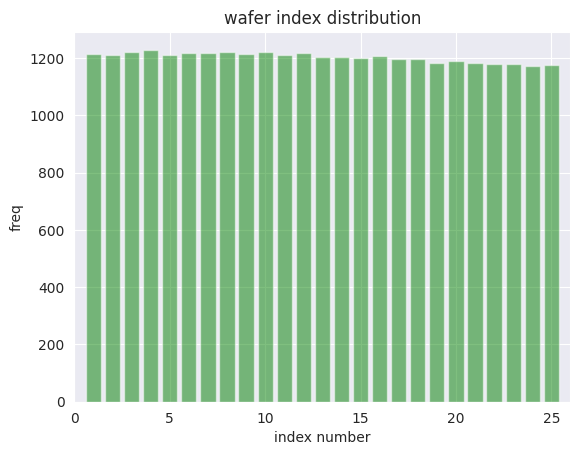

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='green', align='center', alpha=0.5)
plt.title("wafer index distribution")
plt.xlabel("index number")
plt.ylabel("freq")
plt.xlim(0,26)
plt.ylim()
plt.show()

In [4]:
df=df.drop(['waferIndex'], axis=1)

In [5]:
df

,waferMap,dieSize,lotName,trianTestLabel,failureType
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,[[Training]],[[none]]
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,[[Training]],[[none]]
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,[[Training]],[[none]]
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,[[Training]],[[none]]
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,[[Training]],[[none]]
...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,[],[]
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,[],[]
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,[],[]
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,[],[]


In [6]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0, 'Near-full':1, 'Edge-Loc':2, 'Edge-Ring':3, 'Loc':4, 'Random':5,'Scratch':6, 'Donut':7, 'none':8}
mapping_traintest={'Training':0, 'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

In [7]:
tol_wafers=df.shape[0] # 행 갯수 반환
tol_wafers

30078

In [8]:
df

,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,[[Training]],[[none]],8,0
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,[[Training]],[[none]],8,0
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,[[Training]],[[none]],8,0
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,[[Training]],[[none]],8,0
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,[[Training]],[[none]],8,0
...,...,...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,[],[],[],[]
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,[],[],[],[]
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,[],[],[],[]
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,[],[],[],[]


In [9]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)] # 새로운 데이터 프레임 생성
df_withlabel = df_withlabel.reset_index() # 앞에서 생성한 데이터 프레임의 인덱스 재설정
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)] # 새로운 데이터 프레임 생성
df_withpattern = df_withpattern.reset_index() # 데이터 프레임 인덱스 재설정
df_nonpattern = df[(df['failureNum']==8)] # 새로운 데이터 프레임 생성
df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0] # 각 데이터 프레임 행 갯수 반환

(14366, 877, 13489)

/tmp/ipykernel_12188/606641776.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels2)


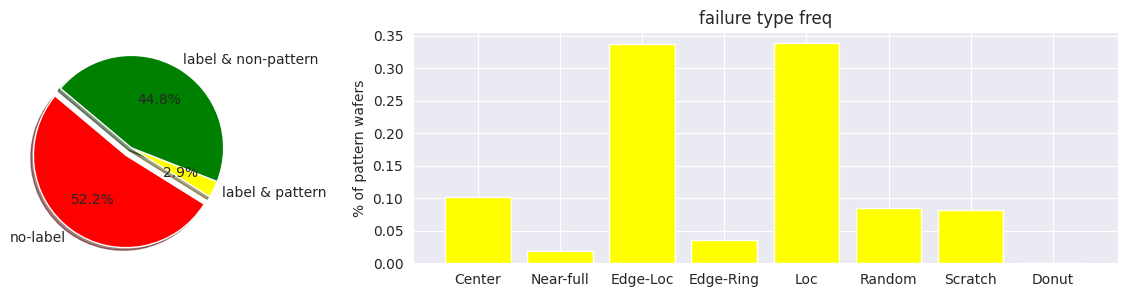

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
figure = plt.figure(figsize=(15,3))
gridspec = gridspec.GridSpec(1, 2, width_ratios=[1,2])
ax1 = plt.subplot(gridspec[0])
ax2 = plt.subplot(gridspec[1])

no_wafers=[tol_wafers-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]

colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)
labels = ['no-label', 'label & pattern', 'label & non-pattern']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2=['','Center','Near-full','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Donut']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='yellow', align='center', alpha=1)
ax2.set_title("failure type freq")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

In [11]:
filtering = df[df['failureType'].apply(lambda x:x.shape == (0, 0) or x[0][0] == 'none')]
filtering['failureType'] = 8
filtering

/tmp/ipykernel_12188/169458020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtering['failureType'] = 8


,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,[[Training]],8,8,0
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,[[Training]],8,8,0
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,[[Training]],8,8,0
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,[[Training]],8,8,0
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,[[Training]],8,8,0
...,...,...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,[],8,[],[]
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,[],8,[],[]
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,[],8,[],[]
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,[],8,[],[]


In [12]:
valid = df[df['failureType'].apply(lambda x: len(x) >0 and len(x[0]) > 0 and x[0][0] != 'none')]
valid

,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum
186,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",533.0,lot8,[[Training]],[[Edge-Ring]],3,0
264,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,...",533.0,lot11,[[Training]],[[Edge-Loc]],2,0
377,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,lot16,[[Training]],[[Edge-Loc]],2,0
381,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot16,[[Training]],[[Edge-Loc]],2,0
397,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,lot16,[[Training]],[[Edge-Loc]],2,0
...,...,...,...,...,...,...,...
679154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42175,[[Test]],[[Loc]],4,1
679165,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42176,[[Test]],[[Center]],0,1
679167,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,...",533.0,lot42176,[[Test]],[[Edge-Loc]],2,1
679176,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42176,[[Test]],[[Edge-Loc]],2,1


In [13]:
df

,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,[[Training]],[[none]],8,0
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,[[Training]],[[none]],8,0
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,[[Training]],[[none]],8,0
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,[[Training]],[[none]],8,0
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,[[Training]],[[none]],8,0
...,...,...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,[],[],[],[]
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,[],[],[],[]
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,[],[],[],[]
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,[],[],[],[]


In [14]:
mapping_type={'Center':0, 'Near-full':1, 'Edge-Loc':2, 'Edge-Ring':3, 'Loc':4, 'Random':5,'Scratch':6, 'Donut':7, 'none':8}

def map_failure_type(failure_list):
    # numpy array를 리스트로 변환
    if isinstance(failure_list, np.ndarray):
        failure_list = failure_list.tolist()

    # 리스트 안에 리스트가 있으면 첫 번째 원소를 추출
    while isinstance(failure_list, list) and len(failure_list) > 0:
        if isinstance(failure_list[0], list):
            failure_list = failure_list[0]  # 첫 번째 리스트 추출
        else:
            break  # 더 이상 리스트가 아닐 때 중단

    # 빈 리스트 또는 'none', None 값 처리
    if not failure_list or failure_list[0] in ['none', None]:
        return 8

    # 실패 타입을 class2idx 딕셔너리에서 매핑, 없으면 8 반환
    return mapping_type.get(failure_list[0], 8)

df['failureType'] = df['failureType'].apply(map_failure_type)
print(df['failureType'])


150       8
151       8
152       8
153       8
154       8
         ..
679275    8
679276    8
679277    8
679278    8
679279    8
Name: failureType, Length: 30078, dtype: int64


In [15]:
df[df['failureType'] != 8]

,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum
186,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",533.0,lot8,[[Training]],3,3,0
264,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,...",533.0,lot11,[[Training]],2,2,0
377,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,lot16,[[Training]],2,2,0
381,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot16,[[Training]],2,2,0
397,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,lot16,[[Training]],2,2,0
...,...,...,...,...,...,...,...
679154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42175,[[Test]],4,4,1
679165,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42176,[[Test]],0,0,1
679167,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,...",533.0,lot42176,[[Test]],2,2,1
679176,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42176,[[Test]],2,2,1


In [16]:
df = df.drop('failureNum', axis=1)
df = df.drop('trainTestNum', axis=1)
df

,waferMap,dieSize,lotName,trianTestLabel,failureType
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,[[Training]],8
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,[[Training]],8
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,[[Training]],8
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,[[Training]],8
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,[[Training]],8
...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,[],8
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,[],8
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,[],8
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,[],8


In [17]:
df['failureType'].value_counts()

failureType
8    29201
4      297
2      296
0       90
5       74
6       72
3       31
1       16
7        1
Name: count, dtype: int64

In [18]:
features = df['waferMap']
targets = df['failureType']

In [19]:
from scipy.ndimage import gaussian_filter, median_filter, rotate
from sklearn.cluster import DBSCAN
import numpy as np
# 1. 필터링 - 양방향 필터와 가우시안 필터 적용
def apply_advanced_filter_to_features(features, targets):
    filtered_maps = []
    corresponding_targets = []

    for wafer_map, failure_type in zip(features, targets):
        # 미디언 필터 적용 (크기 3x3)
        median_filtered = median_filter(wafer_map, size=3)
        # 가우시안 필터 적용 (sigma=1)
        # gaussian_filtered = gaussian_filter(median_filtered, sigma=1)

        # 결함 이외의 부분은 그대로 유지
        filtered_map = np.where(wafer_map == 0, 0, median_filtered)
        filtered_maps.append(filtered_map)
        corresponding_targets.append(failure_type)

    return np.array(filtered_maps), np.array(corresponding_targets)
features, targets = apply_advanced_filter_to_features(features, targets)

In [20]:
features[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0],
       [0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [21]:
from sklearn.model_selection import train_test_split
from collections import Counter

# 각 클래스의 개수를 확인
class_counts = Counter(targets)
print("클래스 분포:", class_counts)

# 데이터가 2개 미만인 클래스 제거
valid_classes = [cls for cls, count in class_counts.items() if count >= 2]
mask = np.isin(targets, valid_classes)
features = features[mask]
targets = targets[mask]

# filtered_targets에서 8을 7로 변환 (특징 데이터가 아닌 타겟 데이터에서 변환)
targets = np.where(targets == 8, 7, targets)

# 다시 데이터 분리 (filtered_features는 2D 배열이어야 함)
X_train, X_test, Y_train, Y_test = train_test_split(
    features, targets, shuffle=True, random_state=123, stratify=targets
)

print("훈련 세트 크기:", X_train.shape, "테스트 세트 크기:", X_test.shape)


클래스 분포: Counter({np.int64(8): 29201, np.int64(4): 297, np.int64(2): 296, np.int64(0): 90, np.int64(5): 74, np.int64(6): 72, np.int64(3): 31, np.int64(1): 16, np.int64(7): 1})
훈련 세트 크기: (22557, 26, 26) 테스트 세트 크기: (7520, 26, 26)


In [22]:
print(X_train.shape, Y_train.shape)

(22557, 26, 26) (22557,)


In [23]:
from scipy.ndimage import gaussian_filter, median_filter, rotate
from sklearn.cluster import DBSCAN
import numpy as np


# 2. 데이터 증강 - 랜덤 회전, 스케일링, 노이즈 추가
# 2. 데이터 증강 - 회전 및 뒤집기
def augment_data(wafer_maps, targets):
    augmented_maps = []
    augmented_targets = []

    # feature와 target을 동시에 순회
    for wafer_map, target in zip(wafer_maps, targets):
        # 원본 데이터는 항상 추가
        augmented_maps.append(wafer_map)
        augmented_targets.append(target)

        # 결함이 있는 클래스만 증강 (pass class 8 제외)

            # 90도 회전 데이터 추가
        augmented_maps.append(rotate(wafer_map, 90))
        augmented_targets.append(target)

        # 상하 뒤집기 데이터 추가
        augmented_maps.append(np.flip(wafer_map, axis=0))
        augmented_targets.append(target)

        # 좌우 뒤집기 데이터 추가
        augmented_maps.append(np.flip(wafer_map, axis=1))
        augmented_targets.append(target)

    return np.array(augmented_maps), np.array(augmented_targets)



# 3. 특징 추출 - 결함 비율, 중앙/가장자리 결함 비율, 결함 군집화 점수
def extract_features(wafer_maps):
    features = []
    for wafer_map in wafer_maps:
        total_die = np.sum(wafer_map > 0)
        defect_die = np.sum(wafer_map == 2)
        defect_ratio = defect_die / total_die if total_die > 0 else 0

        center_region = wafer_map[9:17, 9:17]  # 중앙 영역
        center_defect_ratio = np.sum(center_region == 2) / defect_die if defect_die > 0 else 0

        edge_region = np.pad(wafer_map[1:-1, 1:-1], pad_width=1, mode='constant')  # 가장자리
        edge_defect_ratio = np.sum(edge_region == 2) / defect_die if defect_die > 0 else 0

        # 결함 군집화 점수 계산 (DBSCAN으로 결함 군집화)
        defect_positions = np.argwhere(wafer_map == 2)
        if len(defect_positions) > 0:
            clustering = DBSCAN(eps=2, min_samples=2).fit(defect_positions)
            n_clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
        else:
            n_clusters = 0

        # 특징 리스트에 추가
        features.append([defect_ratio, center_defect_ratio, edge_defect_ratio, n_clusters])

    return np.array(features)

In [24]:
# 필터링 적용
X_train_aug, Y_train_aug = augment_data(X_train, Y_train)


In [25]:
X_train_aug = np.array([np.log1p(i) for i in X_train_aug])
X_test = np.array([np.log1p(i) for i in X_test])

In [26]:
print('mean : ', X_train_aug.mean())
print('std : ', X_train_aug.std())
print('min : ', X_train.min())
print('max : ', X_train.max())

mean :  0.5522


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/numpy/_core/_methods.py:164: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


std :  inf
min :  0
max :  2


In [27]:
print(type(X_train))  # wafer_map이 배열인지 확인
print(X_train.ndim)  # 배열의 모양 확인 (2D 배열이어야 함)
print(X_train.shape)

<class 'numpy.ndarray'>
3
(22557, 26, 26)


In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train_no_aug = encoder.fit_transform(Y_train.reshape(-1, 1))
y_train_aug = encoder.transform(Y_train_aug.reshape(-1, 1))
y_test = encoder.transform(Y_test.reshape(-1, 1))

In [35]:
import torch
from torch.utils.data import Dataset, DataLoader

class WaferDataset(Dataset):
    def __init__(self, wafer_maps, labels):
        self.wafer_maps = wafer_maps
        self.labels = labels

    def __len__(self):
        return len(self.wafer_maps)

    def __call__(self, *args, **kwargs):
        print('wafer DS called')

    def __getitem__(self, idx):
        wafer_map = self.wafer_maps[idx]
        wafer_map_tensor = torch.tensor(wafer_map, dtype=torch.float32).unsqueeze(0).to(torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return wafer_map_tensor.to('cuda'), label.to('cuda')



from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train_no_aug = encoder.fit_transform(Y_train.reshape(-1, 1))
y_train_aug = encoder.transform(Y_train_aug.reshape(-1, 1))
y_test = encoder.transform(Y_test.reshape(-1, 1))



In [36]:
y_train_no_aug = y_train_no_aug.toarray()
y_train_aug = y_train_aug.toarray()
y_test = y_test.toarray()

In [37]:
train_no_aug_ds = WaferDataset(X_train, y_train_no_aug)
train_aug_ds = WaferDataset(X_train_aug, y_train_aug)
test_ds = WaferDataset(X_test, y_test)

In [38]:
x,y = next(iter(train_aug_ds))

In [39]:
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6934,
          0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934,
          0.6934, 0.6934, 0.6934, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6934, 0.6934,
          0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934,
          0.6934, 0.6934, 0.6934, 0.6934, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.6934, 0.6934, 0.6934, 0.6934,
          0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934,
          0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.6934, 0.0000, 0.0000,
          0.0000, 0.0000],
    

In [40]:
import torch
import torch.nn as nn

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x) 
        out = self.relu(out)
        return out


class MyEnhancedModel(nn.Module):
    def __init__(self, inch=1, num_classes=9):
        super(MyEnhancedModel, self).__init__()
        self.init_conv = nn.Sequential(
            nn.Conv2d(inch, 16, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True)
        )

        self.layer1 = ResidualBlock(16, 32, stride=2)
        self.layer2 = ResidualBlock(32, 64, stride=2)
        self.layer3 = ResidualBlock(64, 128, stride=2)
        self.layer4 = ResidualBlock(128, 256, stride=2)

        self.global_avg_pool = nn.AdaptiveAvgPool2d(1) 
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.init_conv(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.global_avg_pool(x)
        x = self.fc(x)
        return x

model = MyEnhancedModel()
tmp = torch.randn(4, 1, 60, 60)
output = model(tmp)
print(output.shape)  

torch.Size([4, 9])


In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split
import numpy as np
from tqdm import tqdm

class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0


train_size = int(0.8 * len(train_no_aug_ds))
val_size = len(train_no_aug_ds) - train_size
train_ds, val_ds = random_split(train_no_aug_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)


model_no_aug = MyEnhancedModel().cuda()
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model_no_aug.parameters(), lr=0.001)
early_stopping = EarlyStopping(patience=5, delta=0.001)


n_epochs = 50
for epoch in tqdm(range(n_epochs)):
    model_no_aug.train()
    train_loss = 0.0
    for batch in train_loader:
        inputs, labels = batch
        inputs, labels = inputs.cuda(), labels.argmax(dim=1).cuda()
        optimizer.zero_grad()
        outputs = model_no_aug(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

 
    train_loss /= len(train_loader.dataset)


    model_no_aug.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            inputs, labels = batch
            inputs, labels = inputs.cuda(), labels.argmax(dim=1).cuda()  
            outputs = model_no_aug(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)

   
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break
        
        


  2%|▏         | 1/50 [00:02<02:14,  2.75s/it]

Epoch 1, Train Loss: 0.1424, Validation Loss: 0.0992


  4%|▍         | 2/50 [00:04<01:48,  2.26s/it]

Epoch 2, Train Loss: 0.1132, Validation Loss: 0.1053


  6%|▌         | 3/50 [00:07<01:52,  2.40s/it]

Epoch 3, Train Loss: 0.1045, Validation Loss: 0.0917


  8%|▊         | 4/50 [00:09<01:40,  2.20s/it]

Epoch 4, Train Loss: 0.0953, Validation Loss: 0.0920


 10%|█         | 5/50 [00:11<01:40,  2.24s/it]

Epoch 5, Train Loss: 0.0909, Validation Loss: 0.0935


 12%|█▏        | 6/50 [00:13<01:37,  2.22s/it]

Epoch 6, Train Loss: 0.0862, Validation Loss: 0.0847


 14%|█▍        | 7/50 [00:15<01:37,  2.27s/it]

Epoch 7, Train Loss: 0.0812, Validation Loss: 0.0966


 16%|█▌        | 8/50 [00:17<01:28,  2.11s/it]

Epoch 8, Train Loss: 0.0773, Validation Loss: 0.0838


 18%|█▊        | 9/50 [00:19<01:22,  2.00s/it]

Epoch 9, Train Loss: 0.0721, Validation Loss: 0.1129


 20%|██        | 10/50 [00:21<01:17,  1.93s/it]

Epoch 10, Train Loss: 0.0686, Validation Loss: 0.1081


 20%|██        | 10/50 [00:23<01:32,  2.31s/it]

Epoch 11, Train Loss: 0.0616, Validation Loss: 0.1355
Early stopping


In [42]:
train_size = int(0.8 * len(train_aug_ds))
val_size = len(train_aug_ds) - train_size
train_ds, val_ds = random_split(train_aug_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

model_aug = MyEnhancedModel().cuda()
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model_aug.parameters(), lr=0.001)
early_stopping = EarlyStopping(patience=5, delta=0.001)

n_epochs = 50
for epoch in tqdm(range(n_epochs)):
    model_aug.train()
    train_loss = 0.0
    for batch in train_loader:
        inputs, labels = batch
        inputs, labels = inputs.cuda(), labels.argmax(dim=1).cuda()  
        optimizer.zero_grad()
        outputs = model_aug(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)


    model_aug.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            inputs, labels = batch
            inputs, labels = inputs.cuda(), labels.argmax(dim=1).cuda()  
            outputs = model_aug(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

  2%|▏         | 1/50 [00:07<06:27,  7.90s/it]

Epoch 1, Train Loss: 0.1151, Validation Loss: 0.1018


  4%|▍         | 2/50 [00:15<06:11,  7.74s/it]

Epoch 2, Train Loss: 0.0960, Validation Loss: 0.1062


  6%|▌         | 3/50 [00:22<05:48,  7.41s/it]

Epoch 3, Train Loss: 0.0898, Validation Loss: 0.0986


  8%|▊         | 4/50 [00:29<05:32,  7.23s/it]

Epoch 4, Train Loss: 0.0850, Validation Loss: 0.0817


 10%|█         | 5/50 [00:36<05:20,  7.11s/it]

Epoch 5, Train Loss: 0.0813, Validation Loss: 0.0825


 12%|█▏        | 6/50 [00:43<05:09,  7.04s/it]

Epoch 6, Train Loss: 0.0790, Validation Loss: 0.0806


 14%|█▍        | 7/50 [00:50<05:00,  6.99s/it]

Epoch 7, Train Loss: 0.0768, Validation Loss: 0.0795


 16%|█▌        | 8/50 [00:57<04:58,  7.10s/it]

Epoch 8, Train Loss: 0.0737, Validation Loss: 0.0783


 18%|█▊        | 9/50 [01:04<04:48,  7.04s/it]

Epoch 9, Train Loss: 0.0726, Validation Loss: 0.0836


 20%|██        | 10/50 [01:11<04:44,  7.12s/it]

Epoch 10, Train Loss: 0.0702, Validation Loss: 0.0789


 22%|██▏       | 11/50 [01:19<04:40,  7.18s/it]

Epoch 11, Train Loss: 0.0693, Validation Loss: 0.0785


 24%|██▍       | 12/50 [01:26<04:34,  7.21s/it]

Epoch 12, Train Loss: 0.0665, Validation Loss: 0.0852


 24%|██▍       | 12/50 [01:34<04:58,  7.86s/it]

Epoch 13, Train Loss: 0.0639, Validation Loss: 0.0843
Early stopping


In [43]:
from sklearn.metrics import balanced_accuracy_score
import torch

# 테스트에서 balanced accuracy score를 계산하는 함수
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch
            inputs, labels = inputs.cuda(), labels.argmax(dim=1).cuda()  # CUDA로 이동

            # 모델 예측
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)  # 각 샘플의 예측 클래스

            # 예측값과 실제 레이블을 CPU로 이동하여 저장
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # balanced accuracy score 계산
    balanced_acc = balanced_accuracy_score(all_labels, all_preds)
    print(f'Balanced Accuracy Score: {balanced_acc:.4f}')
    return balanced_acc
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)
balanced_accuracy1 = evaluate_model(model_no_aug, test_loader)
balanced_accuracy2 = evaluate_model(model_aug, test_loader)


Balanced Accuracy Score: 0.1250
Balanced Accuracy Score: 0.2974
